In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
ds = pd.read_excel('TestLr1.xlsx', header=0)

In [ ]:
ds.head()

,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Prices
0,40.036887,3,11.284460,4.675,1,115
1,38.158431,2,11.670782,0.415,0,120
2,38.981977,3,5.828134,8.973,1,140
3,35.231935,2,5.836629,3.647,0,145
4,39.426625,3,2.318770,9.674,1,160


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
ds.shape

(250, 6)

In [ ]:
ds.describe()

,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Prices
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,24.680659,9.388000,12.024486,4.495920,6.804000,567.440000
std,9.268054,8.875616,7.578532,4.063063,6.432659,463.727527
min,2.664595,0.000000,0.681983,0.171000,0.000000,115.000000
25%,17.960297,3.000000,6.805859,1.623250,2.000000,250.000000
50%,23.872200,7.000000,10.404596,3.302000,5.000000,410.000000
75%,32.170299,12.000000,15.213242,6.220000,8.750000,687.500000
max,42.561498,63.000000,35.095400,24.621000,32.000000,2900.000000


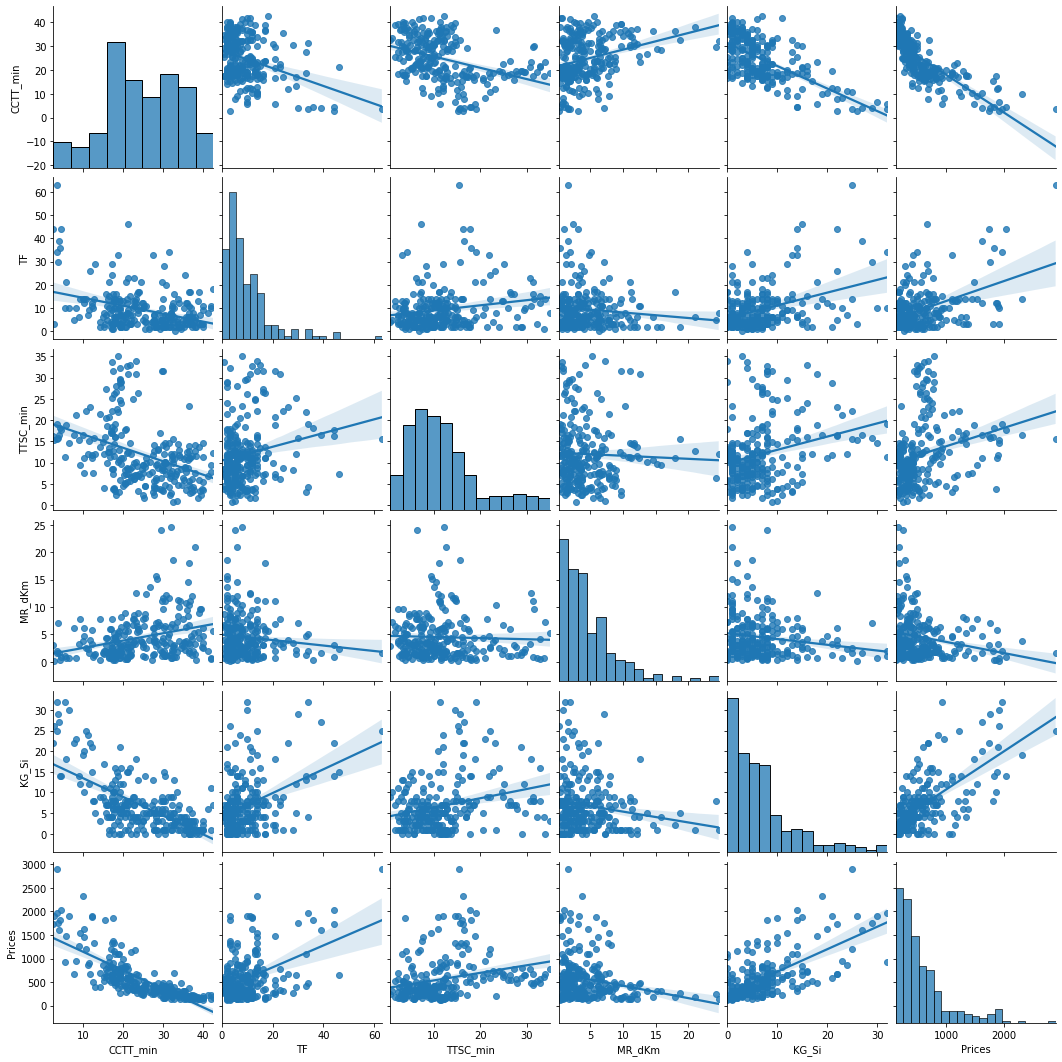

In [ ]:
sns.pairplot(data=ds, kind='reg')

In [ ]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [ ]:
lin_reg_mod = LinearRegression()

In [ ]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
pred = lin_reg_mod.predict(X_test)

In [ ]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [ ]:
print(test_set_rmse)
print(test_set_r2)

313.8512083413502
0.6426680174405159


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, pred))

Mean Absolute Error: 232.43703008785758
Mean Squared Error: 98502.58097732558
Root Mean Squared Error: 313.8512083413502
R^2 Score :           0.6426680174405159


In [ ]:
logtc = np.log(ds["CCTT_min"])

loglstat = np.log(ds["TF"])




/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
ds.info

<bound method DataFrame.info of       CCTT_min  TF   TTSC_min  MR_dKm  KG_Si  Prices
0    40.036887   3  11.284460   4.675      1     115
1    38.158431   2  11.670782   0.415      0     120
2    38.981977   3   5.828134   8.973      1     140
3    35.231935   2   5.836629   3.647      0     145
4    39.426625   3   2.318770   9.674      1     160
..         ...  ..        ...     ...    ...     ...
245   9.092526   6  15.257724   3.281     14    1260
246  19.477785   3  16.524567   8.201      6    1280
247  17.295162   3  16.924378   7.766      4    1340
248  15.419344   3  16.112196   1.921      8    1810
249   9.953845  14  16.424376   3.760     19    2320

[250 rows x 6 columns]>

In [ ]:
np.percentile(ds.Pop_Ha, [99])

array([9954.48])

In [ ]:
np.percentile(ds.Pop_Ha, [99])[0]

9954.479999999985

In [ ]:
uv=np.percentile(ds.Pop_Ha, [99])[0]

In [ ]:
ds[(ds.Pop_Ha)>uv]

,Area Type,Prices,CCTT_min,CCD_km,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,GS_dkm,WB_dkm
201,WA,810,16.80,8.51,8,11.29,6.1,11,17498,0.088,"1,664"
205,WA,860,11.25,4.98,7,12.11,2.3,24,15015,0.066,"1,500"
207,WA,910,11.53,6.49,9,15.08,1.7,12,10762,0.020,0.701


In [ ]:
ds.Pop_Ha[(ds.Pop_Ha)>3*uv]=3*uv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.percentile(ds.Pop_Ha, [1])[0]

0.0

In [ ]:
lv=np.percentile(ds.Pop_Ha, [1])[0]

In [ ]:
ds[(ds.Pop_Ha==lv)]

,Area Type,Prices,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,GS_dkm,WB_dkm
79,W,310,26.87,2,10.05,13.6,5,0,0.057,0.320
80,W,310,28.62,2,9.63,15.1,1,0,0.095,0.210
111,W,600,15.32,8,4.03,1.5,11,0,0.053,0
139,WA,310,35.37,24,8.64,3.5,1,0,0.077,0.895
162,WA,510,17.72,3,17.87,0.5,0,0,0,"1,720"
197,WA,770,15.66,16,27.21,3.1,7,0,0.002,0.334
209,WA,1100,19.01,13,3.09,0.7,0,0,0.188,"2,393"


In [ ]:
ds.

In [ ]:
ds['Pop_Ha'].replace(to_replace=0, method='bfill')

0       218
1       305
2       991
3       402
4      1073
       ... 
245    2226
246    6680
247    1292
248    2565
249    1386
Name: Pop_Ha, Length: 250, dtype: int64

In [ ]:
ds.corr()

,Prices,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha
Prices,1.000000,-0.787387,0.444902,0.262737,-0.231136,0.662360,0.238495
CCTT_min,-0.787387,1.000000,-0.356891,-0.386579,0.306446,-0.655432,-0.335354
TF,0.444902,-0.356891,1.000000,0.188928,-0.108698,0.397290,0.105571
TTSC_min,0.262737,-0.386579,0.188928,1.000000,-0.039365,0.263855,0.125232
MR_dKm,-0.231136,0.306446,-0.108698,-0.039365,1.000000,-0.166716,-0.107957
KG_Si,0.662360,-0.655432,0.397290,0.263855,-0.166716,1.000000,0.353852
Pop_Ha,0.238495,-0.335354,0.105571,0.125232,-0.107957,0.353852,1.000000


del ds['CCD_km']

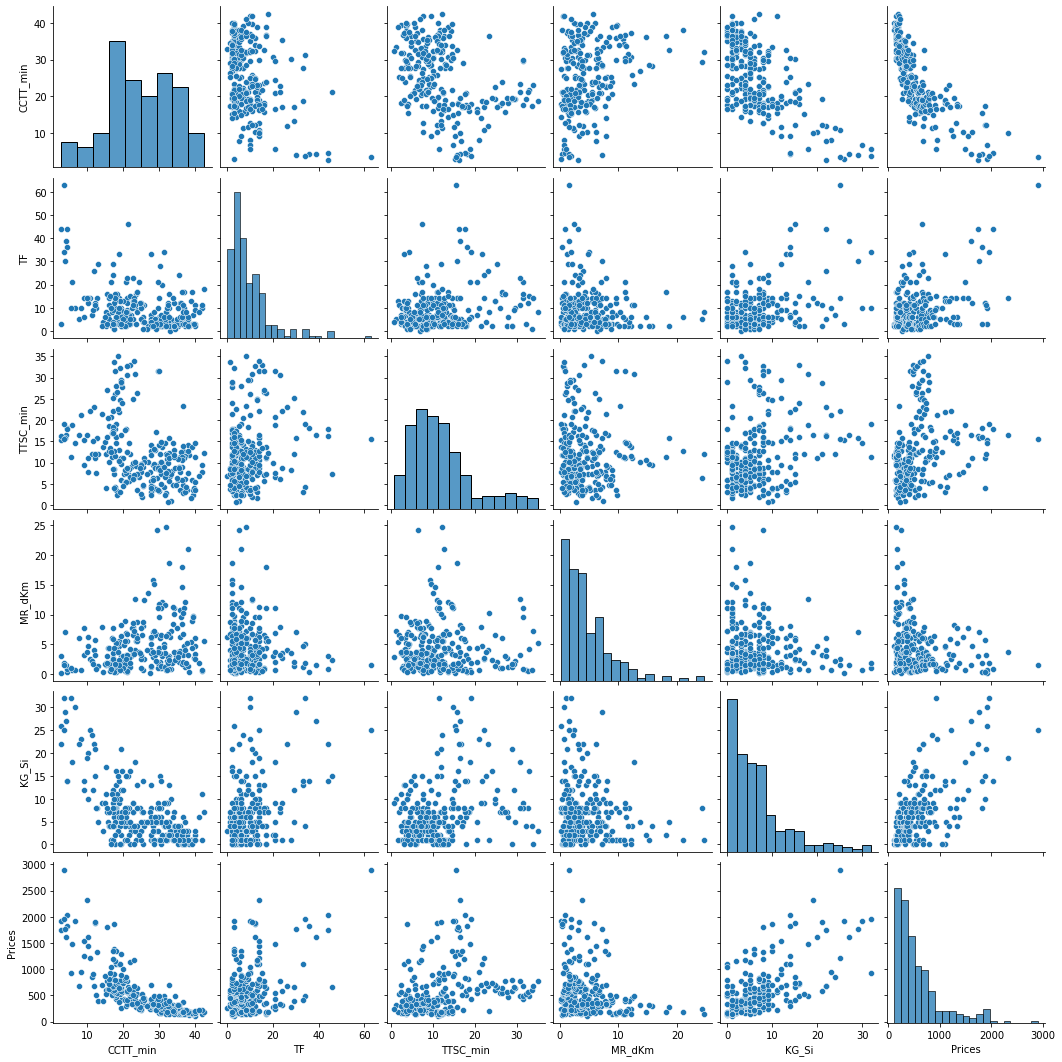

In [ ]:
sns.pairplot(ds)

In [ ]:

import logging as log
# Input dataset
X = ds.iloc[:, :-1].values
print(X)
# Output or Predicted Value of data
y = ds.iloc[:, -1].values
#print(log(y))

[[40.03688747  3.         11.28445975  4.675       1.        ]
 [38.15843052  2.         11.67078165  0.415       0.        ]
 [38.98197697  3.          5.82813436  8.973       1.        ]
 ...
 [17.29516153  3.         16.92437754  7.766       4.        ]
 [15.41934382  3.         16.11219643  1.921       8.        ]
 [ 9.9538452  14.         16.42437641  3.76       19.        ]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [ ]:
predict_reg = LinearRegression()

In [ ]:
predict_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  1215.5532181027534
Coefficient value of Model is  [-31.21309828   6.33659546  -2.66546116   0.80776307  12.35063196]


In [ ]:
y_pred = predict_reg.predict(X_test)

In [ ]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,340,676.233891
1,175,74.103429
2,410,636.856016
3,205,43.197336
4,145,71.390048
5,630,788.527586
6,770,844.546598
7,650,612.318327
8,210,275.318734
9,420,449.593778


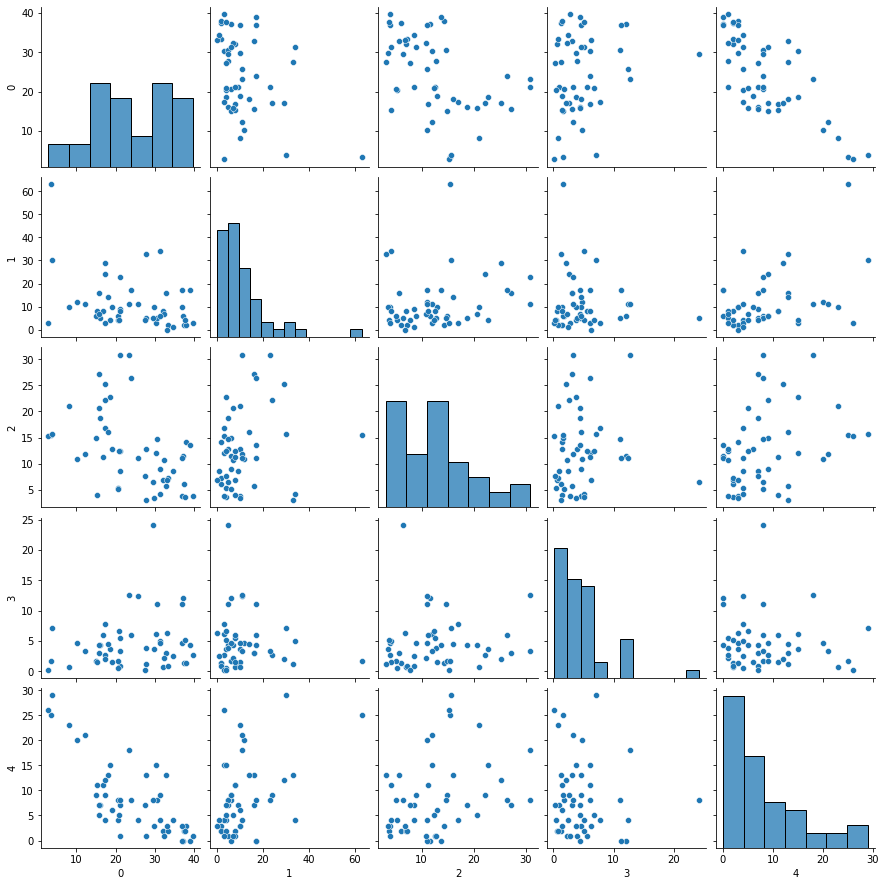

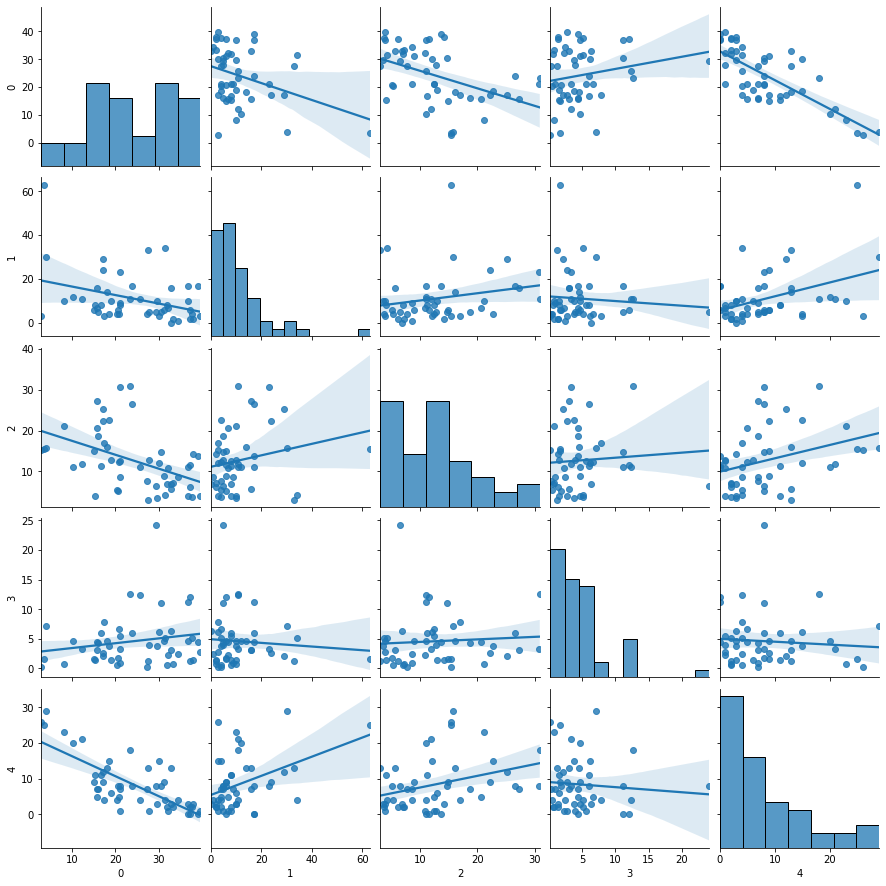

In [ ]:
sns.pairplot(pd.DataFrame(X_test, y_test), kind='scatter')
sns.pairplot(pd.DataFrame(X_test, y_pred),kind='reg')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 183.44099904995372
Mean Squared Error: 77272.3355507858
Root Mean Squared Error: 277.97901998313796
R^2 Score :           0.7415997094487887
